In [1]:
from beartype.door import is_bearable
import static_frame as sf 
from grabble.types import FlagArray
import beartype.typing as bt

In [2]:
flags = sf.SeriesHE(
    (1,1,1), name=('e','v'), 
    index=sf.IndexHierarchy.from_labels(((0,0),(0,2),(1,2)))
)
flags

0,0,1
0,2,1
1,2,1


In [12]:
# is_bearable(FlagArray, flags)
flags.name, flags.index.depth
print(FlagArray('e','v'))

typing.Annotated[static_frame.core.series.SeriesHE, IsAttr['name', IsEqual[('e', 'v')]] & IsAttr['index', IsAttr['depth', IsEqual[2]]]]


In [4]:
print(is_bearable(flags, FlagArray('e','v')))
print(is_bearable(flags, FlagArray('e','t')))

True
False


In [9]:

# from beartype import beartype
# @beartype
# def 

typing.Annotated[static_frame.core.series.SeriesHE, IsAttr['name', IsEqual[('e', 'v')]] & IsAttr['index', IsAttr['depth', IsEqual[2]]]]


In [ ]:
from beartype import beartype
from beartype import typing as bt
from beartype.door import TypeHint as th

from typing_extensions import NamedTuple
import static_frame as sf

from dataclasses import dataclass, InitVar
import networkx as nx
# from typing import NamedTuple
from IPython.display import display
import numpy as np
from numpy.typing import DTypeLike

```
%%coconut 

type E_ID = int | str
type EntitiesIndex = E_ID$[]

type Entity[Data<=bt.Iterable] = (eval(E_ID); Data?)
type Entities = Entity$[]

type IncidenceID[E1<=E_ID, E2<=E_ID] = (E1; E2)
type IncidenceIndex = IncidenceID$[]

type Incidence[D<=int|bool|float] = (IncidenceID; D?)
type Incidences = Incidence$[]
```

```
def eth(typehint) = typehint |> eval |> th

eth(E_ID).is_bearable(1),eth(E_ID).is_bearable(1.10)
```

In [28]:
class A:
    pass

class B(A): 
    pass
def check(A:type, B:type):
    print(chk:=th(A)>=th(B))
    return chk

[check(x,y) for x,y in [
    (A,B),  # True?
    (bt.List[A], bt.List[B]),  # False?
    (bt.Tuple[A], bt.Tuple[B]),  # True?
    (bt.Sequence[A], bt.Sequence[B]),  # True?
    (bt.Union[A,int], bt.Union[B,int]),  # True? 
    (bt.Callable[[A],int], bt.Callable[[B],int]),  # False?
]]


True
True
True
True
True
True


[True, True, True, True, True, True]

In [6]:
from beartype.vale import IsInstance
class Token(str):
    ...

@beartype
class Tester(bt.Annotated[str, IsInstance[Token]]):
    ...

isinstance(Tester('abc'), Token)

False

In [7]:
from typing import runtime_checkable
from phantom import Phantom
from phantom.predicates import Predicate
from phantom._utils.misc import resolve_class_attr 
from beartype.door import is_bearable

def of_beartype(t: bt.Union[type, bt.Tuple[type, ...]]) -> Predicate[object]:
    """ From `phantom.predicates.generic.of_type`

    Create a new predicate that succeeds when its argument is bearable on ``t``.
    """

    def check(a: object) -> bool:
        return is_bearable(a, t)

    return check


T = bt.TypeVar("T", covariant=True)

class Bearable(Phantom, bt.Generic[T], abstract=True):
    def __init_subclass__(
        cls,
        bound: type[T] | None = None,
        abstract: bool = False,
        **kwargs: bt.Any,
    )->None:
        super().__init_subclass__(bound=bound, abstract=True, **kwargs)
        beartype_predicate: Predicate[T] = of_beartype(cls.__bound__)
        resolve_class_attr(cls, "__abstract__", abstract)
        resolve_class_attr(cls, "__predicate__", beartype_predicate)


class SupportsIDType(
    Phantom, 
    bound=bt.Union[int,str], 
    predicate=of_beartype(bt.Union[int,str])
):
    """could fix to hashable, positive, etc...later"""
    ...

E_ID: bt.TypeAlias = SupportsIDType
E1 = bt.TypeVar('E1', bound=E_ID)

DT = bt.TypeVar('DT')
class DataTuple(
    bt.Tuple[DT], 
    Phantom, 
    predicate=of_beartype(bt.Tuple[DT])
):
    """Holds entity metadata"""
    ...

DataTupleGeneric = bt.TypeVar('DataType', bound=DataTuple)
Entity: bt.TypeAlias = DataTuple[E_ID, DataTupleGeneric]  # This hard-codes Optional for everyone...

class EntitiesIndex(bt.Iterable[E_ID], Phantom, predicate=of_beartype(bt.Iterable[E_ID])):
    ...

# EntitiesIndex = bt.Iterable[E_ID]


# DataToTag = bt.TypeVar('DataType', bt.Iterable, contravariant=True)

# @runtime_checkable
# class Taggable(bt.Protocol[DataType]): 
#     def __call__(data: DataToTag) -> Entity[DataToTag]
#         ...

class DataArray(bt.Iterable[DataV], Phantom, predicate=of_beartype(bt.Iterable[DataV])):
    ...

class EntityIndex(bt.Iterable[E_ID], Phantom, predicate=of_beartype(bt.Iterable[E_ID])):
    ...

class EntityArray(bt.Iterable[Entity], Phantom, predicate=of_beartype(bt.Iterable[Entity])):
    ...



E2 = bt.TypeVar('E2', bound=E_ID)
IncidenceID: bt.TypeAlias = DataTuple[E1, E2]

class IncidenceIndex(bt.Iterable[IncidenceID], Phantom, predicate=of_beartype(bt.Iterable[IncidenceID])):
    ...

class SupportsSparseDType(Bearable, bound=bt.Union[int,bool,float, None]):
## what? th(DTypeLike) >= th(bt.Bool)  # ugghhh
    ...

SparseDTypeVar= bt.TypeVar('SparseDTypeGeneric', bound=SupportsSparseDType)

IncidenceGeneric: bt.TypeAlias = DataTuple[IncidenceID, SparseDTypeVar]
class IncidenceGenericArray(bt.Iterable[IncidenceGeneric], ):
    ...

Incidence: bt.TypeAlias = IncidenceGeneric[E1, E2, bt.Literal[True]]  # default "E1 is incident to E2"
IncidenceArray: bt.TypeAlias = IncidenceGenericArray[E1, E2, bt.Literal[True]]


NameError: name 'DataV' is not defined

In [8]:
isinstance(1,E_ID), th(E_ID).is_bearable(1),th(E_ID).is_bearable(1.10), 

(True, True, False)

In [9]:
(th(EntityIndex).is_bearable((1,2,3)),
 th(DataTuple).is_bearable((1,2,3)),
)

th(DataTuple)<th(tuple)

NameError: name 'EntityIndex' is not defined

In [10]:
(th(Entity).is_bearable(('hi',(2,3,4))),  # this works
 th(Entity).is_bearable((1.20,(2,3,4))),  # 1.2 is not an E_ID
 th(Entity).is_bearable((0,None)))        # Entity data is optional


(False, False, False)

In [4]:
class Fake(bt.NamedTuple):
    name:str
    kind:str
    velocity:float

MyFakeEntity = Entity[Fake]

(th(MyFakeEntity).is_bearable((0,Fake('n1', 'bob',2.5))),  # is a "fake"
 th(MyFakeEntity).is_bearable((0,('n1', 'bob',2.5)))       # technically not a "fake"
)

NameError: name 'Entity' is not defined

In [12]:
@beartype
def to_frame(record_items: bt.Iterable[EntityTypeOf[Fake]]):
    return sf.Frame.from_records_items(record_items)

f1=to_frame((
    (0,Fake('n1', 'bob',2.5)),
    (1,Fake('n2', 'jill', 3.0)),
    (2,Fake('n3', 'steve',1.2)),
    (3,Fake('n4', 'karen', 2.8)),
))
display(f1)
f1.dtypes



NameError: name 'EntityTypeOf' is not defined

In [29]:
class Fake(bt.NamedTuple):
    name:str
    kind:str
    velocity:float

list(sf.Frame.from_records_items((
    (0,Fake('n1', 'bob',2.5)),
    (1,Fake('n2', 'jill', 3.0)),
    (2,Fake('n3', 'steve',1.2)),
    (3,Fake('n4', 'karen', 2.8)),
)).iter_tuple(axis=1, constructor=Fake))



[Fake(name='n1', kind='bob', velocity=2.5),
 Fake(name='n2', kind='jill', velocity=3.0),
 Fake(name='n3', kind='steve', velocity=1.2),
 Fake(name='n4', kind='karen', velocity=2.8)]

In [37]:
G = nx.random_graphs.connected_watts_strogatz_graph(25, 4, 0.7)

nx.set_edge_attributes(G, values = 1, name = 'weight')
nx.set_node_attributes(G, nx.pagerank(G), name='importance')

# nf = sf.Frame()

# nodelist = nodes.data()
#     .assign(name=lambda df: 'node_'+df.index.astype(str))
#     .rename_axis(index='nid')
# )
# edgelist = (
#     nx.to_pandas_edgelist(G)
#     .rename_axis(index='eid')
#     .assign(name=lambda df: 'edge_'+df.index.astype(str))
# )#.reset_index()

#the source-target way (old, implicitly directed way)
sf.Series.from_element(True, index=sf.IndexHierarchy.from_labels(G.edges))

# instead, split it out (choose directed vs undirected)
ef = sf.Frame.from_records_items(enumerate(G.edges))
ein = sf.SeriesHE.from_element(1, index=sf.IndexHierarchy.from_labels(ef[0].items()))
eou = sf.SeriesHE.from_element(1, index=sf.IndexHierarchy.from_labels(ef[1].items()))
s = sf.SeriesHE.from_concat((ein,eou))
# ein.index.values_at_depth(1)
ein

0,0,1
1,0,1
2,0,1
3,1,1
4,1,1
5,1,1
6,2,1
7,2,1
8,2,1
9,2,1
10,3,1


In [43]:
s.iloc[:10]

0,0,1
1,0,1
2,0,1
3,1,1
4,1,1
5,1,1
6,2,1
7,2,1
8,2,1
9,2,1


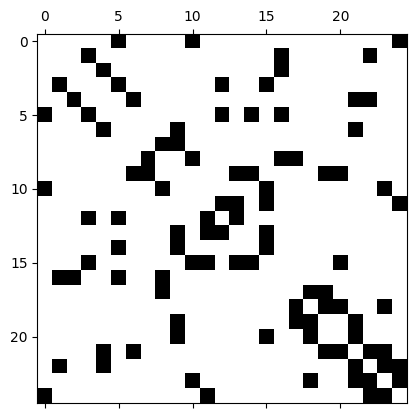

In [31]:
import scipy.sparse as sprs
Bin = sprs.coo_array((ein, (ein.index.values_at_depth(0), ein.index.values_at_depth(1))), shape=(ein.size, 25)).toarray()
Bou = sprs.coo_array((eou, (eou.index.values_at_depth(0), eou.index.values_at_depth(1))), shape=(eou.size, 25)).toarray()
plt.spy(Bou.T@Bin+Bin.T@Bou)
# sf.SeriesHE.

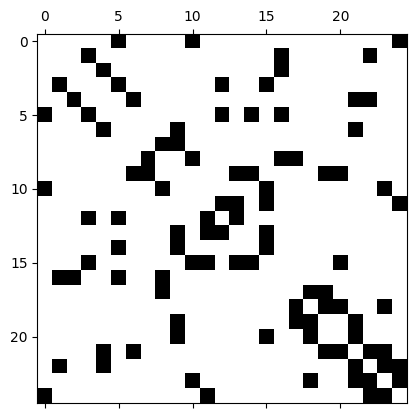

In [32]:
import matplotlib.pyplot as plt
plt.spy(nx.to_numpy_array(G))

In [51]:
from attrs import frozen, evolve, field, define
# https://www.wikiwand.com/en/Incidence_structure
from bidict import frozenbidict
from functools import cache
from cytoolz import valmap

EntityType = bt.TypeVar('EntityType', bound=bt.Hashable)
EntityIndex: bt.TypeAlias = frozenbidict[EntityType,int]

@frozen 
class Incidence:
    """triple $(E1, E2, I), I \in E1 \cross E2$  
    we go ahead and store these in `frozenbidict`'s to enable fast lookup of integer IDs 
    """
    entities: bt.Tuple[EntityIndex, EntityIndex]
    flags: sf.Series  # should be Series[IndexHierarchy[E1, E2], int|bool]
    
RoleIndex: bt.TypeAlias = frozenbidict[str, Incidence]


def matrix_from_incidence(inc: Incidence)-> sprs.csc_array:
    """detour through coo_array, using size(entity_set)x2 for shape"""
    row_idx = inc.flags.index.values_at_depth(0)
    col_idx = inc.flags.index.values_at_depth(1)
    shape = tuple(len(bd) for bd in inc.entities)
    return sprs.coo_array((ein, (row_idx, col_idx)), shape=shape).tocsc()

    
def _wrap_incidence_as_role(inc:Incidence|RoleIndex)->RoleIndex:
    if isinstance(inc, Incidence):
        return frozencbidict(base=inc)
    else: 
        return inc 

def _get_base_or_first(d, basename):
    return d.get(basename, d[next(iter(d))])

@frozen 
class Grabble:
    # flags: sf.Series  # Series[IndexHierarchy[E1, E2], int|bool]
    role_flags:RoleIndex=field(converter=_wrap_incidence_as_role) 
    # ^ Different possible roles to play in an incidence structure
    base_name:str = 'base'  # the name of the role that we use by default
    # roles: bt.Mapping[str, sprs.csc_array] = field(init=False)

    # ^ should auto-gen a default "base" if not provided
    # entity_sets: bt.Tuple[bt.Set, bt.Set]  # O(1) membership tests, not index-construction
    # ^ probably better as bidict to enable int/pos <--> name by default. 
    # B: sprs.csc_array = field()
    
    @property
    def flags(self)->sf.Series:
        return _get_base_or_first(self.role_flags,self.base).flags
    
    @cache
    @property
    def roles(self)-> bt.Mapping[str, sprs.csc_array]:
        return valmap(self.role_flags, matrix_from_incidence)
                      
    @property
    def B(self)->sprs.csc_array:
        return _get_base_or_first(self.roles, self.base)
    


# @define        
# class Grabble:
#     ...

In [73]:
alph_sr = sf.Series(map(str, range(10000)), index=sf.IndexAutoFactory)
alph_bd = frozenbidict(alph_sr.to_pairs())

%timeit 500 in alph_sr
%timeit 500 in alph_bd

301 ns ± 1.67 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
109 ns ± 0.585 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [74]:
500 in alph_sr

True

In [78]:
%timeit alph_bd.get(100, alph_bd[next(iter(alph_bd))])
%timeit alph_bd.get(10000, alph_bd[next(iter(alph_bd))])

462 ns ± 6.14 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
563 ns ± 3.13 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [83]:
tuple(len(bd) for bd in (alph_bd, alph_bd))



(10000, 10000)